## Micro-RNA, RNA abundances, Boolean networks

2024 - 2025

Alan M H Beem

##### This file executes behavior to demonstrate functionality of MicroRNAAbundantBooleanNetwork class (work in progress)

I'd characterize this as an "Extreme OOP" approach to representation of miRNA-target interactions; I don't think it's how I'd choose to implement actual calculations at scale for cellular biology modeling, but, it's a useful formalization, and could be used to define values used in a matrix multiplication approach.

In [1]:
# setup
from mirna_demo_methods import get_mir_abn_net
from abn_mir_plotting_functions import plot_abundances, get_colors, plot_target_sites
import math
import matplotlib.pyplot as plt
from random import SystemRandom
from abundant_boolean_networks_with_micro_rna import MicroRNAAbundantBooleanNetwork, MicroRNANode


colors = get_colors(25, True)
mir_abn = get_mir_abn_net(seq_random=False)

### Micro-RNA knockdown of abundant RNA sequences:

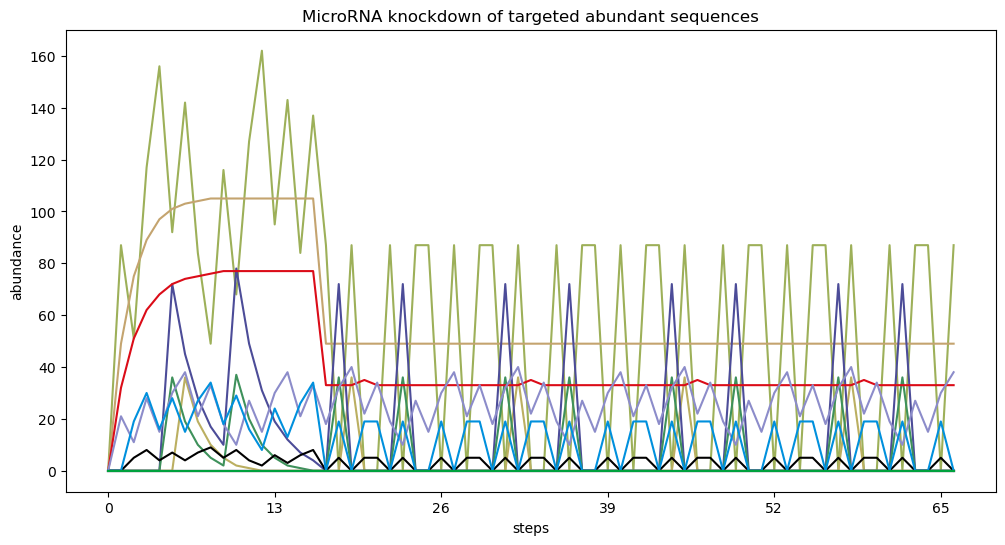

In [2]:
mir_abn.animate_boolean_states_list(mir_abn.bn_collapsed_cycles.cycle_records[0], 5, True)
plot_abundances(mir_abn.current_abundances_list, "MicroRNA knockdown of targeted abundant sequences",
                colors, True, [], None, None, [12, 6], [len(mir_abn.bn_collapsed_cycles.cycle_records[0])*tick_i for tick_i in range(5 + 1)])

#### Bartel 2009: this defines a starting point

![Figure 4](Relative_Mean_Eff_miRNA_Sites__Bartel_2009.png) 

#### Target sites:

In [3]:
plot_target_sites(mir_abn, colors, '')
# plot_target_sites(mir_abn, colors, 'Target sites on represented RNA sequences')

miR:                      3'...CUCCCC.-5'
mRNA: 5'...CUCCUAGCACAGUUUAGUGCGAGGGGAUUACAGUGAGCUU...3'		site type: 7mer-A1
                               |150


miR:                      3'...AUGUCA.-5'
mRNA: 5'...ACAGUUUAGUGCGAGGGGAUUACAGUGAGCUUACAGUCUA...3'		site type: 6mer
                               |158


miR:                      3'...AUGUCA.-5'
mRNA: 5'...CGAGGGGAUUACAGUGAGCUUACAGUCUACUUGGACAAGC...3'		site type: 6mer
                               |169


miR:                      3'...GAUUUU.-5'
mRNA: 5'...UGGUCACCGGUUUGGCACACCUAAAAGGCCAUCGGACCUA...3'		site type: 6mer
                               |234


miR:                      3'...CUCCCC.-5'
mRNA: 5'...GACCUACCCCAGGUUAUGGUGAGGGGGGAGCAUCUCUUCA...3'		site type: 6mer
                               |63


miR:                      3'...CUCCCCCC.-5'
mRNA: 5'...GACCUACCCCAGGUUAUGGUGAGGGGGGAGCAUCUCUUCA...3'		site type: 8mer
                               |63


miR:                      3'...UCCCCCC.-5'
mRNA: 5'...ACCUACCCCAGGUUAUGGU

#### Mean log fold change per site type

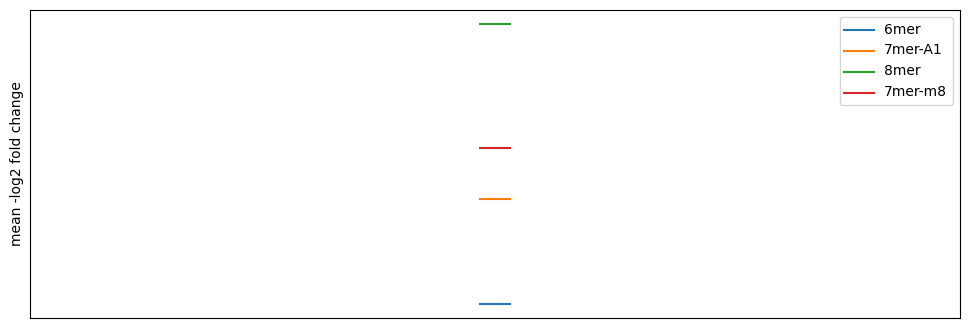

In [7]:
test_mabn = MicroRNAAbundantBooleanNetwork(50, list(range(16)), 2, 400, 100)

test_mabn.add_abundant_nodes(100)
for node in test_mabn.get_plottable_nodes():
    node.three_prime_utr = ''.join(SystemRandom().choices(['A', 'U', 'G', 'C'], k=800))
    node.current_abundance = 500

mir_nodes = [MicroRNANode() for _ in range(100)]
for mir in mir_nodes:
    mir.sequence = ''.join(SystemRandom().choices(['A', 'U', 'G', 'C'], k=21))
    mir.current_ago2_loaded = 50000
test_mabn.add_micro_rna_nodes(mir_nodes)

test_mabn.setup_target_site_lists()  # maybe keep a list of target sites and modify them throughout

sites_dict = dict()
for node in test_mabn.get_plottable_nodes():
    for site in node.target_sites:
        value = sites_dict.get(site.type_string, [])
        knockdown = float(site)
        if knockdown < 0.001:
            sites_dict.update({site.type_string:value + [0]})
        else:
            sites_dict.update({site.type_string:value + [float(site)]})

fig = plt.figure()
fig.set_size_inches(12,4)
for key in sites_dict.keys():
    values = [-math.log2(v) for v in sites_dict.get(key) if v > 0.01]
    this_y = [sum(values) / len(values)]
    plt.scatter(x=[0], y=this_y, label=key, marker='_', s=500)  # -math.log2(
plt.yticks([])
plt.xticks([])
plt.ylabel('mean -log2 fold change')
plt.legend()
plt.show()
